In [46]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

### Red_he-ne_laser
### Red Laser wavelength (collapsing)
#### $$λ_{red\_collapsing} = \frac{2 \Delta D}{fn}$$
#### $$ \Delta D = \frac{fλ}{2} n $$

In [47]:
f = 20
data = pd.DataFrame()
data['n'] = np.concatenate([np.arange(0,91,10),np.arange(110,211,10)])
data['D (mm)'] = [25.22, 25.31, 25.38, 25.46, 25.53, 25.59,
             25.66, 25.72, 25.78, 25.85,
             25.98, 26.04, 26.12, 26.18, 26.24,
             26.31, 26.37, 26.44, 26.52, 26.58, 26.65]
data['ΔD (mm)'] = data['D (mm)'] - data.loc[0,'D (mm)']

data.to_csv('red_collapsing_he-ne_laser.csv', index = False)
data

,n,D (mm),ΔD (mm)
0,0,25.22,0.00
1,10,25.31,0.09
2,20,25.38,0.16
3,30,25.46,0.24
4,40,25.53,0.31
5,50,25.59,0.37
6,60,25.66,0.44
7,70,25.72,0.50
8,80,25.78,0.56
9,90,25.85,0.63


#### $$y = mx$$ 
#### $$regression$$

λ = 6.852382435432728e-07


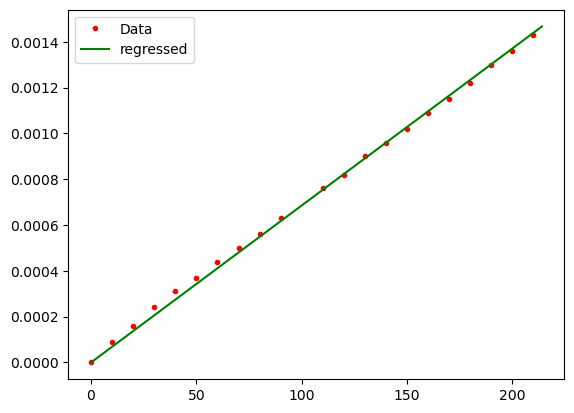

In [50]:
x = data['n'].to_numpy()
y = data['ΔD (mm)'].to_numpy()*1e-3

def formula(n,λ):
    return 0.5*f*λ*n

para, para_cov = curve_fit(formula, x, y, [600e-9])
λ = para[0]
print('λ =', λ)

x_reg = np.linspace(0,214,107)
y_reg = formula(x_reg, λ)

plt.plot(x,y,'.', color = "red", label = "Data")
plt.plot(x_reg,y_reg, '-', color = "green", label = "regressed")
plt.legend()
plt.show()